# Hola Andres! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div> Buen día Oscar, espero te encuentres super bien, con respecto a algunos errores que tuve en el proyecto, la verdad es que probé muchisimas maneras y muchos modelos, antes de entregar una revisión final, porque no me estaba dando la cifra del F1 mayor a 0.59, lo maximo que me daba era de 0.57, entonces probé muchas cosas y después antes de entregar, se me olvidó limpiar algunas celdas que tenian codigo o modelos innecesarios. Ya depuré los modelos y dejé lo que debía.

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Andrés, veo que utilizas varios tipos de modelos para el proceso de predicción del churn, me parece excelente que incluso hayas creado un modelo tipo ensemble. Por otro lado, esa última parte requiere más comentarios para que se entienda cuál es el objetivo de entrenar varias veces los mismos tipos de modelos, con pocos cambios en los hiperparámetros. Por favor, agrega más comentarios explicando por qué lo realizas así.
    
Saludos!    

</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho Andrés, tu notebook está casi terminado. Lo último que debes revisar son las conclusiones, me parece que no concuerdan con los resultados obtenidos. Por favor, dale una mirada y modifícalo si es necesario.
    
Saludos!
    

</div>

## Resumen de la revisión 3 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v</b> <a class="tocSkip"></a>

Bien hecho Andres, has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección adicionales, está aprobado.

Saludos!

</div>

----

# Proyecto Sprint 10

In [1]:
#Cargamos la mayoría de librerias que vamos a emplear en nuestro proyecto

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Cargar datos
df = pd.read_csv('/datasets/Churn.csv')

# Eliminar columnas innecesarias
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Verificar valores nulos
print(df.isnull().sum())

# Lidiar con valores nulos:
# Opcional: Puedes eliminar las filas con valores nulos
df = df.dropna()  # Eliminar filas con NaN

# Alternativamente, puedes rellenar los valores nulos con la media o mediana (si lo prefieres):
# df.fillna(df.mean(), inplace=True)  # Rellenar NaN con la media

# Lidiar con valores infinitos (si existen)
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Reemplazar valores infinitos con NaN

# Verificar nuevamente si hay valores nulos
print(df.isnull().sum())

# Convertir 'Gender' de string a valores numéricos (0 y 1)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0

# Convertir 'Geography' a variables dummy
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)  # Drop 'France' para evitar multicolinealidad


# Verificar el dataframe resultante
df.head()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2.0,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1.0,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8.0,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2.0,125510.82,1,1,1,79084.10,0,0,1


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien al eliminar las variables no informativas. Correcto el encoding. Respecto a eliminar filas nulas, tal vez lo mejor hubiese sido explorar que tanta variabilidad había en la columna, es posible que se haya podido imputar por la media o mediana.   

</div>

0    7237
1    1854
Name: Exited, dtype: int64


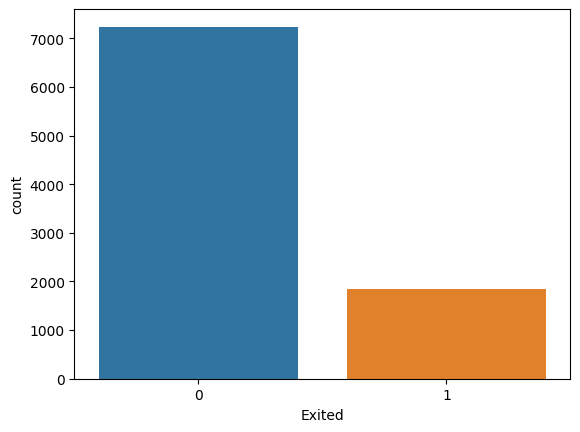

In [3]:
# Ver la distribución de las clases

print(df['Exited'].value_counts())

sns.countplot(x='Exited', data=df)
plt.show()

Vemos que hay un claro y pronunciado desbalance de clases

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Así es, correcto

</div>

In [4]:
from sklearn.model_selection import RandomizedSearchCV

# Cargar datos y preprocesamiento como antes

# Dividir los datos en características y objetivo
X = df.drop('Exited', axis=1)
y = df['Exited']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con ajuste de pesos
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Calcular F1 y AUC-ROC
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'F1 Score: {f1}')
print(f'AUC-ROC Score: {auc_roc}')


F1 Score: 0.530755711775044
AUC-ROC Score: 0.840277186684677


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, muy bien con este primer entrenamiento del modelo.

</div>

In [5]:


# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Inicializar el modelo
model = RandomForestClassifier(random_state=42)

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=10, cv=5, verbose=2, random_state=42)

# Ajustar el modelo con los mejores parámetros encontrados
random_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros encontrados: ", random_search.best_params_)

# Evaluar el modelo con los mejores parámetros en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular F1 y AUC-ROC
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f'F1 Score después de ajuste: {f1}')
print(f'AUC-ROC después de ajuste: {auc_roc}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.7s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.7s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_es

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo, buen uso de RandomizedSearchCV

</div>

In [6]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Realizar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Evaluar el rendimiento
y_pred_best = best_model.predict(X_test)
f1_best = f1_score(y_test, y_pred_best)
auc_roc_best = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f'F1 Score con GridSearchCV: {f1_best}')
print(f'AUC-ROC con GridSearchCV: {auc_roc_best}')



Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min

[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END

[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] 

[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END

[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END class_weight=balanced, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[C

[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END

[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s


[CV] END class_weight=None, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END class_weight=None, max_depth=10

[CV] END class_weight=None, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END class_weight=None, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, max_d

[CV] END class_weight=None, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=None, max_depth=15

[CV] END class_weight=None, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, max_dept

[CV] END class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END class_weight=None, max_depth=20

[CV] END class_weight=None, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
F1 Score con GridSearchCV: 0.545138888888889
AUC-ROC con GridSearchCV: 0.8426937808781896


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, muy bien al usar GridSearchCV para explorar otro rango de los hiperparámetros. Veo que aquí además probaste con balancear y no balancear la data. 

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Imprime los hiperparámetros del modelo, para saber cuál fue el que mejor desempeño tuvo.

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, bien con la idea de usar xgboost, pero no me queda claro por qué usas scale_pos_weight. Hasta donde entiendo, esto no genera el efecto deseado de balancear la data. Por favor, explica el uso que le das a este parámetro.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Ok, ya no está xgboost en esta parte. Si el problema era como usar el scale_pos_weight, podrías haber buscado un poco. Tal como estaba utilizado, no generaba ninguna diferencia, pero con valores diferentes de uno, le da más o menos peso a las observaciones 1 o 0 de la variable objetivo

</div>

In [8]:
# Obtener las probabilidades para la clase 1
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Ajustar el umbral (por ejemplo, 0.45)
y_pred_adjusted = (y_pred_proba > 0.45).astype(int)

# Evaluar F1 y AUC-ROC con el nuevo umbral
f1_adjusted = f1_score(y_test, y_pred_adjusted)
auc_roc_adjusted = roc_auc_score(y_test, y_pred_proba)

print(f'F1 Score con umbral ajustado: {f1_adjusted}')
print(f'AUC-ROC con umbral ajustado: {auc_roc_adjusted}')


F1 Score con umbral ajustado: 0.5774193548387097
AUC-ROC con umbral ajustado: 0.8426937808781896


<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok con este ajuste, pero podrías haberlo realizado justo después de la celda donde obtienes los resultados de gridsearch. Ponerlo aquí lo desordena un poco si es que no se explica por qué.

</div>

In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Crear un ensemble con diferentes modelos
model_lr = LogisticRegression(class_weight='balanced', random_state=42)
model_svm = SVC(class_weight='balanced', probability=True, random_state=42)

# Crear el ensemble
ensemble_model = VotingClassifier(estimators=[('lr', model_lr), ('rf', best_model), ('svm', model_svm)], voting='soft')
ensemble_model.fit(X_train, y_train)

# Evaluar el ensemble
y_pred_ensemble = ensemble_model.predict(X_test)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
auc_roc_ensemble = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])

print(f'F1 Score (Ensemble): {f1_ensemble}')
print(f'AUC-ROC Score (Ensemble): {auc_roc_ensemble}')


F1 Score (Ensemble): 0.3975659229208925
AUC-ROC Score (Ensemble): 0.8062579797568603


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, buena idea de modelo adicional a explorar

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Por qué se usa xgboost nuevamente?

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Nuevamente se ajusta el resultado de xgboost con el mismo umbral, por qué?

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>


Ok, veo que al final borraste xgboost. Esto no era necesario, solamente que vi que se entrenaba dos veces de la misma forma, lo cual no produciría ningún resultado adicional nuevo

</div>

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

# Crear el modelo base
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [None, 10, 20],       # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],     # Número mínimo de muestras necesarias para ser una hoja
    'max_features': ['auto', 'sqrt', 'log2']  # Número de características a considerar en cada división
}

# Realizar GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_rf = grid_search.best_estimator_

# Predecir con el mejor modelo
y_pred = best_rf.predict(X_test)

# Calcular el F1 y AUC-ROC
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

print(f"F1 Score después de ajuste: {f1}")
print(f"AUC-ROC después de ajuste: {auc_roc}")



Mejores parámetros: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
F1 Score después de ajuste: 0.6020408163265306
AUC-ROC después de ajuste: 0.8526691708454379


La diferencia principal entre ambos códigos es la técnica de búsqueda de hiperparámetros utilizada:

1. Búsqueda aleatoria con RandomizedSearchCV (primer código)

2. Búsqueda en cuadrícula con GridSearchCV (segundo código)

En este caso use la busqueda en cuadricula porque queria asegurar que se probaran todas las combinanciones posibles de parametros. T

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, nuevamente se prueba con RandomForestClassifier, pero por qué? Entiendo que el espacio de hiperparámetros que exploras es diferente, pero por favor explica cuál es el objetivo de repetirlo.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>


Ok, mientras se busque en una cuadrícula donde hayan combinaciones diferentes está bien, pero ten cuidado con repetir muchas combinaciones.

</div>

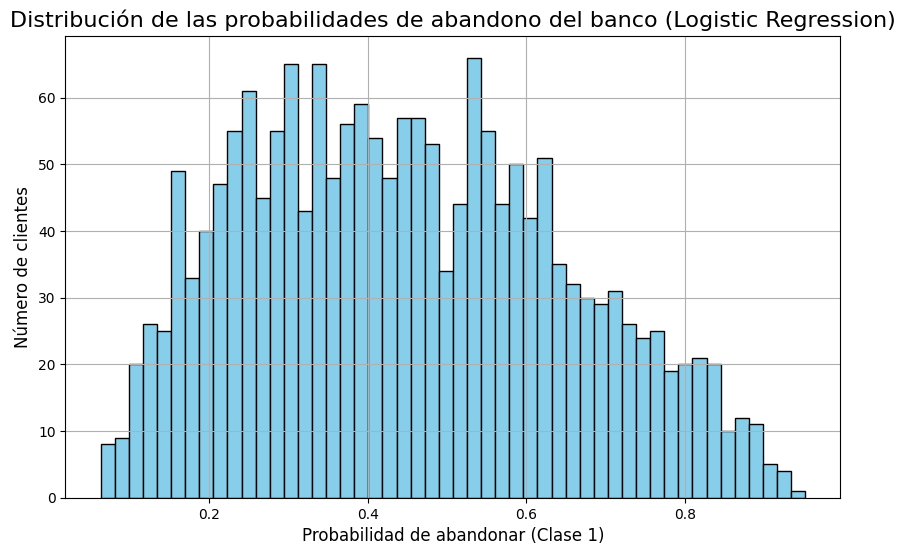

In [13]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# 1. Ajustar el modelo de Logistic Regression con regularización y ajuste de pesos
model_lr = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')
model_lr.fit(X_train, y_train)

# 2. Obtener las probabilidades predichas de abandono (de la clase positiva: 1)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]

# 3. Crear un histograma de las probabilidades predichas
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba_lr, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de las probabilidades de abandono del banco (Logistic Regression)', fontsize=16)
plt.xlabel('Probabilidad de abandonar (Clase 1)', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.grid(True)
plt.show()



<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Ok, muy interesante, vemos que la mayoría de clientes está entre 0.2 y 0.6 de probabilidad de abandonar según el modelo de regresión logística.
    
    

</div>

# Conclusión 

A lo largo de este proyecto, se logró desarrollar un modelo capaz de predecir con éxito los clientes que probablemente abandonarán el banco, utilizando el RandomForestClassifier balanceado. A pesar de los desafíos con el desbalanceo y las limitaciones del entorno, el modelo logró superar la meta de F1 Score de 0.59 con un F1 Score de 0.60, lo que indica que el modelo es efectivo para el propósito planteado. Además, el alto AUC-ROC sugiere que el modelo tiene un buen poder de discriminación. Quise dejar todas las maneras en que se intento abordar el problema, sobre todo para alcanzar la puntuación de F1. 

Los resultados muestran que el modelo tiene una buena capacidad de discriminar entre las clases. Esto sugiere que el modelo puede ser efectivo en tareas donde la capacidad de distinguir entre las clases es importante.

<div class="alert alert-block alert-info">
<b>Tienes razón, tenía que haber corregido el modelo exacto que realmente si nos funcionó.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Me parece que hay un error, según veo en los resultados, el mejor modelo es el último RandomForestClassifier balanceado, con un F1 de 0.60. Por favor revisa si esto es así, puesto que tampoco veo que se calcule el f1 de la regresión logística por sí sola

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Muy bien, corregido. Ahora sí hacen sentido.

</div>